# Titanic - Projeto Final

## Introdução

"O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic[...]

A embarcação partiu em sua viagem inaugural /de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a históri[...]."  <[fonte](https://pt.wikipedia.org/wiki/RMS_Titanic)>

Os dados que serão analisados são do titanic. O objetio deste realizar é realizar a análise de vitimas e fazer questionamentos em relação aos dados disponibilados pela udacity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas

Crie pelo menos cinto perguntas.
Pelo menos três dessas perguntas devem ser compostas (a junção de duas ou mais colunas).

- 1. Qual a idade média dos sobreviventes da primeira classe que embarcaram em Cherbourg?
- 2. Dos sobreviventes qual era a porcentagem de mulheres que sobreviveram ao desastre, e dessas de qual a porcentagem por classe social?
- 3. Dos passageiros embarcados por região, qual teve mais sobreviventes ?
- 4. Qual é a media de idade de sobreviventes em cada classe social, e daqueles que faleceram no naufragio?
- 5. Qual é a classe das pessoas que sobreviveram ?

Explique por que dessa pergunta, o que motivou ela.

### Limpando colunas

In [3]:
df_titanic.dropna(inplace=True, how='any')

### Funções úteis

In [4]:
def media_idade(age):
    faixa = {
        "crianca": 0,
        "adulto": 0,
        "idoso": 0
    }
    for idade in age:
        if idade < 18:
            faixa["crianca"] += 1
        elif 18 < idade < 40:
            faixa["adulto"] += 1
        else:
            faixa["idoso"] += 1
    return faixa

def grafico_idade(age):
    faixa = media_idade(age)
    labels = 'Crianças', 'Adultos', 'Idosos'
    sizes = [faixa["crianca"], faixa["adulto"], faixa["idoso"]]
    explode = (.1, 0, 0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

## Respondendo
### 1 Qual a idade média dos sobreviventes da primeira classe que embarcaram em Cherbourg?

In [5]:
idades = df_titanic.query('Survived == 1 & Embarked == "C" & Pclass == 1')['Age'].values 
        

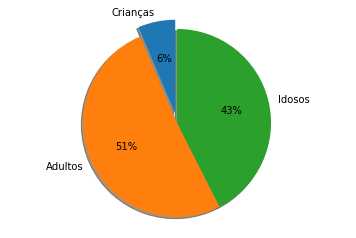

In [6]:
faixa = media_idade(idades)
labels = 'Crianças', 'Adultos', 'Idosos'
sizes = [faixa["crianca"], faixa["adulto"], faixa["idoso"]]
explode = (.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### 2.1. Dos sobreviventes qual era a porcentagem de mulheres que sobreviveram ao desastre

Text(0, 0.5, '')

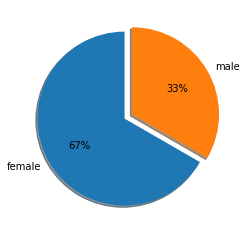

In [7]:
df_titanic.query('Survived == 1')['Sex'].value_counts().plot.pie(
                                        explode=(0, .1), shadow=True, startangle=90, autopct='%1.0f%%').set_ylabel('')

 ### 2.2 E dessas de qual a porcentagem por classe social

Text(0, 0.5, '')

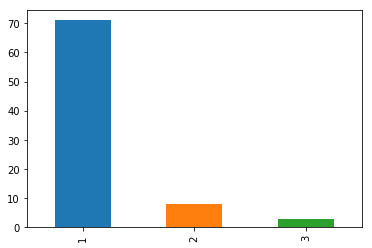

In [8]:
df_titanic.query('Survived == 1 & Sex == "female"')['Pclass'].value_counts().plot.bar().set_ylabel('')

### 3. Dos passageiros embarcados por região, qual teve mais sobreviventes ?

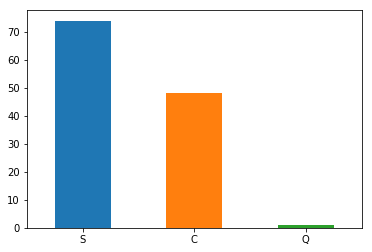

In [9]:
df_titanic.query('Survived == 1')['Embarked'].value_counts().plot.bar(x='lab', y='val', rot=0)

### 4. Qual é a media de idade de sobreviventes ?

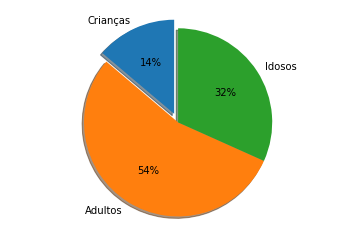

In [10]:
grafico_idade(df_titanic.query('Survived == 1')['Age'].values)


### 5.Qual é a classe das pessoas que sobreviveram ?

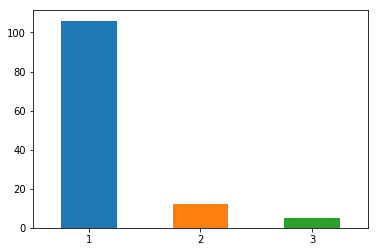

In [11]:
df_titanic.query('Survived == 1')['Pclass'].value_counts().plot.bar(x='lab', y='val', rot=0)

## Bibliografia

Escreva os links que vocês usaram para escrever esse projeto.

[Pie](https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)